In [1]:
%config IPCompleter.greedy=True
%matplotlib inline

import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib import pyplot as plt
import seaborn as sns

Now import the file *conventional_power_plants.csv* from moodle using pandas.

In [2]:
df = pd.read_csv('conventional_power_plants_DE.csv',parse_dates=['commissioned'], index_col=0)
df.dtypes

name_bnetza                      object
block_bnetza                     object
name_uba                         object
company                          object
street                           object
postcode                         object
city                             object
state                            object
country_code                     object
capacity_net_bnetza             float64
capacity_gross_uba              float64
fuel                             object
technology                       object
chp                              object
chp_capacity_uba                 object
commissioned             datetime64[ns]
commissioned_original            object
retrofit                        float64
shutdown                        float64
status                           object
type                             object
lat                             float64
lon                             float64
eic_code_plant                   object
eic_code_block                   object


In [3]:
pd.set_option('display.max_columns', None)

## Excercise 1: Scatterplots

1. Create a scatterplot that shows the development of the the capacity of the german power plants over the years.

In [4]:
df['commissioned'].min() #

Timestamp('1905-01-01 00:00:00')

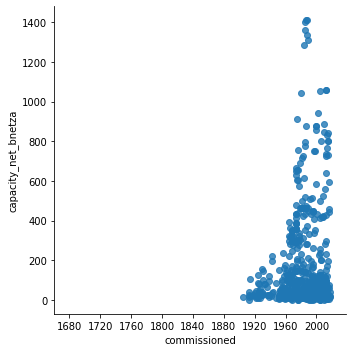

In [5]:
scatterplot = sns.lmplot(x='commissioned', y='capacity_net_bnetza', fit_reg=False, data=df)
#scatterplot.set(xlim = ('1900-01-01', None), ylim=(0, None))

2. Change the scatterplot so that it displays the points by the type of technology they use.

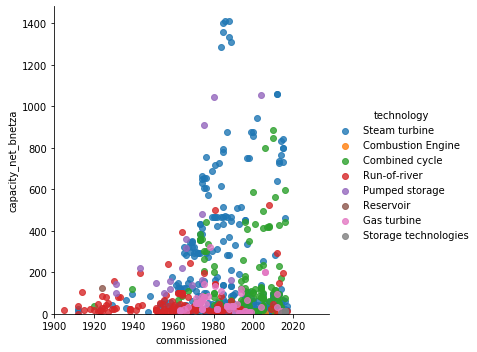

In [6]:
scatterplot = sns.lmplot(x='commissioned', y='capacity_net_bnetza', hue='technology', fit_reg=False, data=df)
scatterplot.set(xlim = ('1900-01-01', None), ylim=(0, None))

## Exercise 2: Boxplots
1. Create a boxplot showing the distribution of the capacity by technology and ensure that the width of the diagram is at minimum 15.

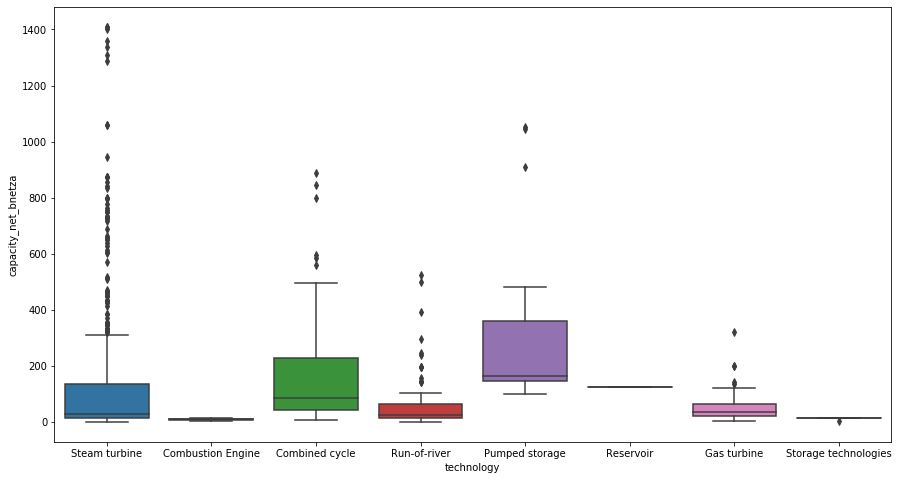

In [7]:
plt.figure(figsize=(15, 8))
df_cap_tech = df[['technology', 'capacity_net_bnetza']].copy()
#sns.boxplot(data=df_cap_tech)
sns.boxplot(data=df_cap_tech, x="technology", y="capacity_net_bnetza")

2. Change to type of plot from boxplot to swarmplot and ensure that following coloring
    * grey = Steam turbine
    * red = Combustion Engine
    * yellow = Combined cycle
    * blue = Run-of-river
    * light-blue = Pumped storage
    * dark blue = Reservoir
    * orange = Gas turbine
    * purple = Storage technologies
    
 You may find it useful to take a look at https://www.w3schools.com/colors/colors_picker.asp as a starting point.

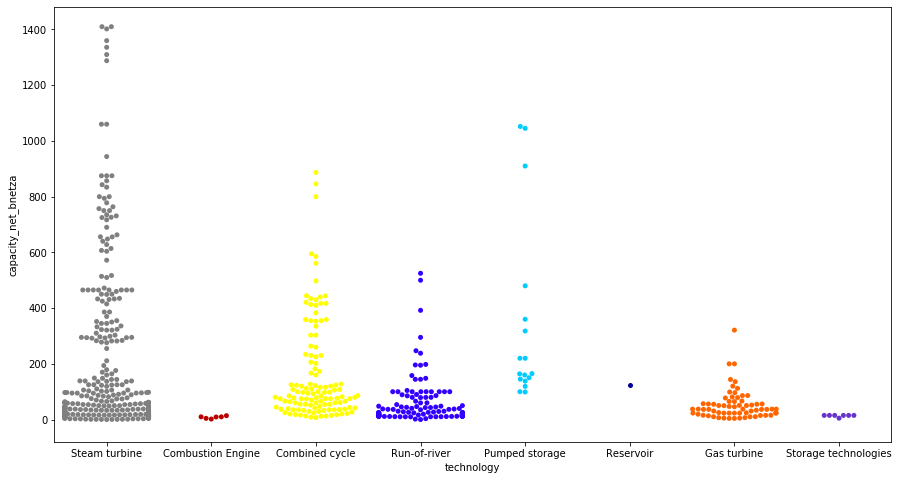

In [8]:
tech_type_colors = ['#808080',  # Steam Turbine
                    '#B80000',  # Combustion Engine
                    '#FFFF00',  # Conbined cylce
                    '#3300FF',  # Run-of-river
                    '#00CCFF',  # Pumped storage
                    '#000099',  # Reservori
                    '#FF6600',  # Gas turbine
                    '#6633CC',  # Storage technologies
                   ]

plt.figure(figsize=(15, 8))
sns.swarmplot(x='technology', y='capacity_net_bnetza', data=df, 
              palette=tech_type_colors)

## Exercise 3: Barplot
1. Create a barchart showing the number of plants per year for 'Bayern'. This obviously requires some data munging with pandas.

Hints:
* Take look at the data frame method <a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html">*loc*</a> and <a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isin.html">*isin*</a>.
* Also, take a look at the possible chart types of <a href="https://seaborn.pydata.org/api.html">seaborn</a>.

In [9]:
df_bayern = df.loc[df['state'] == 'Bayern'].groupby('commissioned').size() # returns series
df_bayern = pd.DataFrame(df_bayern) # convert series to dataframe
df_bayern['index_col'] = df_bayern.index # add index column
df_bayern.columns = ['amount', 'year']
df_bayern

,amount,year
commissioned,,
1920-01-01,2,1920-01-01
1922-01-01,2,1922-01-01
1924-01-01,4,1924-01-01
1925-01-01,1,1925-01-01
1927-01-01,1,1927-01-01
...,...,...
2012-01-01,1,2012-01-01
2013-01-01,2,2013-01-01
2014-01-01,1,2014-01-01


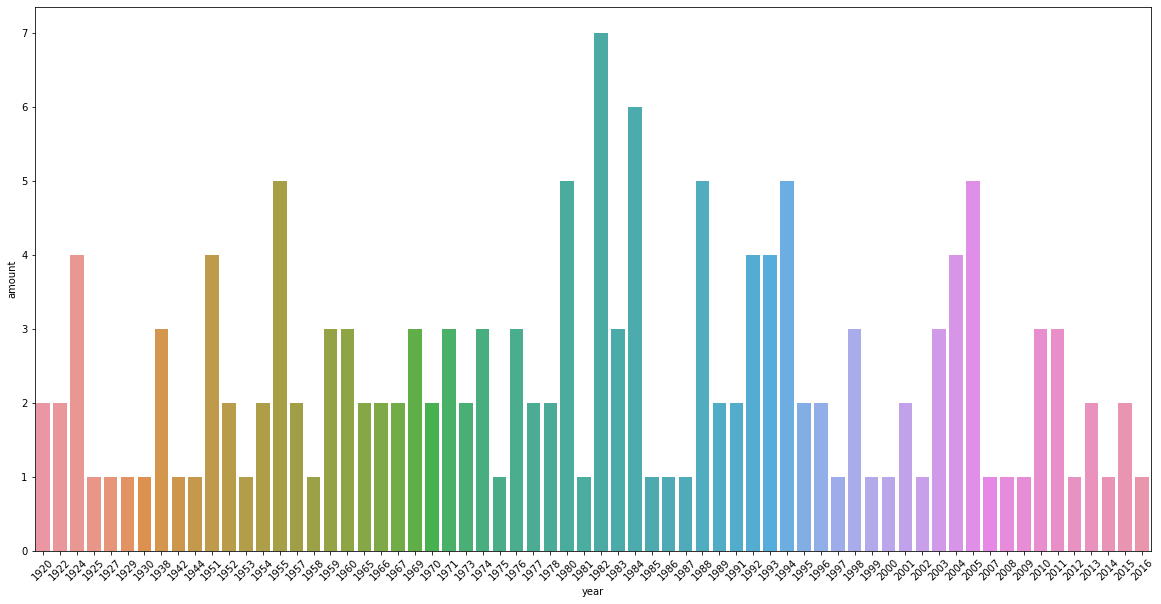

In [10]:
plt.figure(figsize=(20, 10))
ax = sns.barplot(data=df_bayern, x='year', y='amount', orient='v')
ax.set_xticklabels(df_bayern['year'].dt.strftime('%Y'))
for i in ax.get_xticklabels():
    i.set_rotation(45)
plt.show()